In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [18]:
fashion_mnist = keras.datasets.fashion_mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [39]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

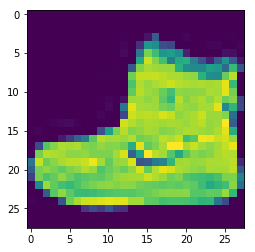

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [42]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [43]:
model2 = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
model2.compile(optimizer=tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#model2.compile(optimizer=tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')

In [45]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total para

In [46]:
#model.fit(train_images, train_labels, epochs=5)
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.9324 - acc: 0.6568
Epoch 2/5
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.6068 - acc: 0.7687
Epoch 3/5
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.5377 - acc: 0.7972
Epoch 4/5
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.4965 - acc: 0.8143
Epoch 5/5
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.4656 - acc: 0.8259


In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3426


0.34259838359355926

In [11]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3544


0.3544397149324417

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 17s 275us/sample - loss: 0.4748
Epoch 2/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.3583
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 16s 275us/sample - loss: 0.3583


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.4757 - acc: 0.8313
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 15s 258us/sample - loss: 0.4754 - acc: 0.8314


In [14]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.1999 - acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0797 - acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0516 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.0377 - acc: 0.9873
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9908
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0279 - acc: 0.9908
